In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
df.head(5)

id  gender   age  ...   bmi   smoking_status stroke
0   9046    Male  67.0  ...  36.6  formerly smoked      1
1  51676  Female  61.0  ...   NaN     never smoked      1
2  31112    Male  80.0  ...  32.5     never smoked      1
3  60182  Female  49.0  ...  34.4           smokes      1
4   1665  Female  79.0  ...  24.0     never smoked      1

[5 rows x 12 columns]

In [6]:
#Checking Duplicated rows
df.duplicated().sum()

0

In [7]:
#Droppig id column which is of no use
df.drop(columns='id',axis=1,inplace=True)

In [8]:
df.head()

gender   age  hypertension  ...   bmi   smoking_status stroke
0    Male  67.0             0  ...  36.6  formerly smoked      1
1  Female  61.0             0  ...   NaN     never smoked      1
2    Male  80.0             0  ...  32.5     never smoked      1
3  Female  49.0             0  ...  34.4           smokes      1
4  Female  79.0             1  ...  24.0     never smoked      1

[5 rows x 11 columns]

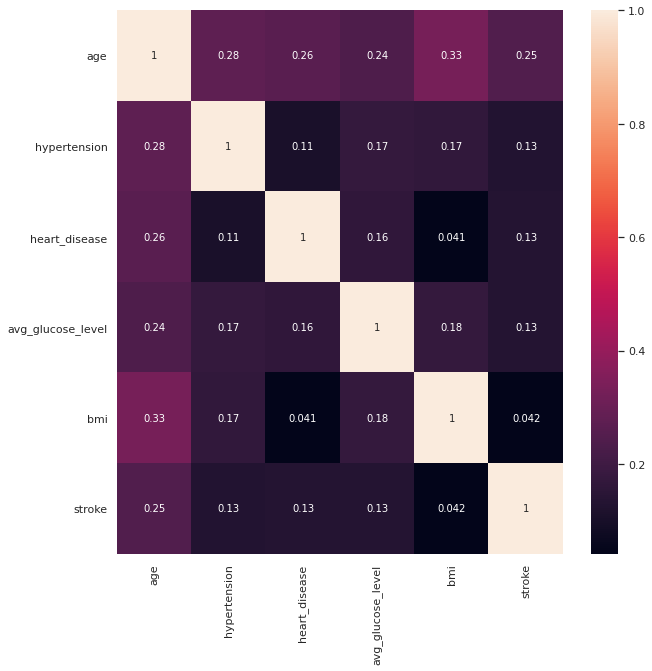

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

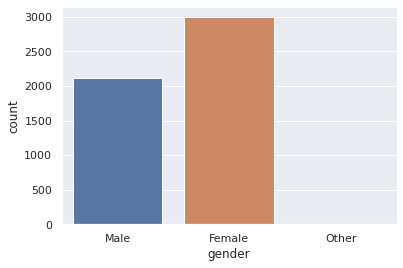

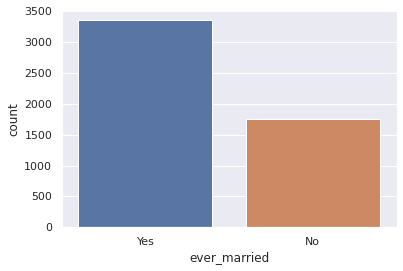

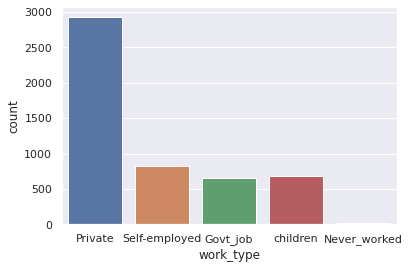

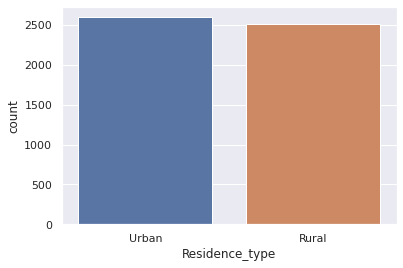

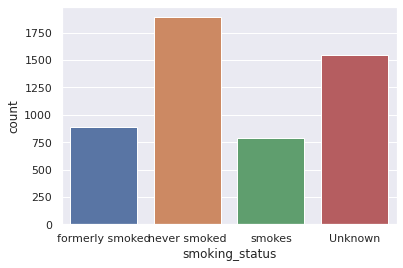

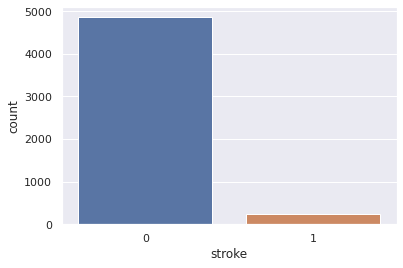

In [10]:
#Data Visualization
data_vis = ['gender','ever_married','work_type','Residence_type','smoking_status','stroke']
for i in data_vis:
  sns.countplot(x=i,data=df)
  plt.show()

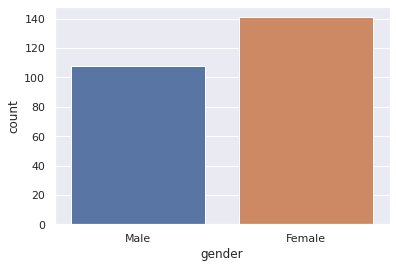

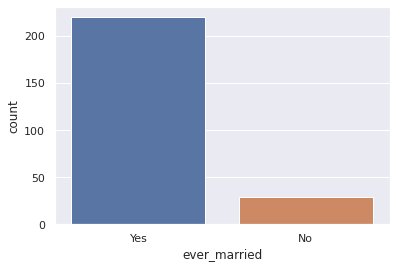

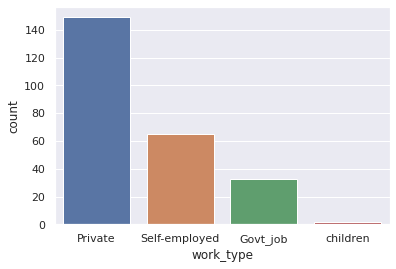

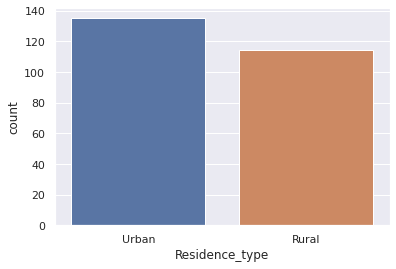

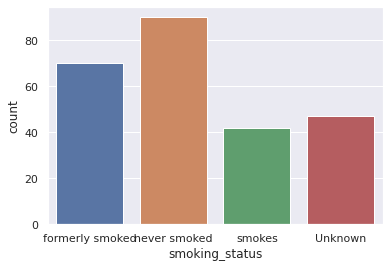

In [11]:
#People having stroke 
people_stroke = df[df['stroke']==1] 
for i in data_vis[:-1]:
  sns.countplot(x=i,data=people_stroke)
  plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


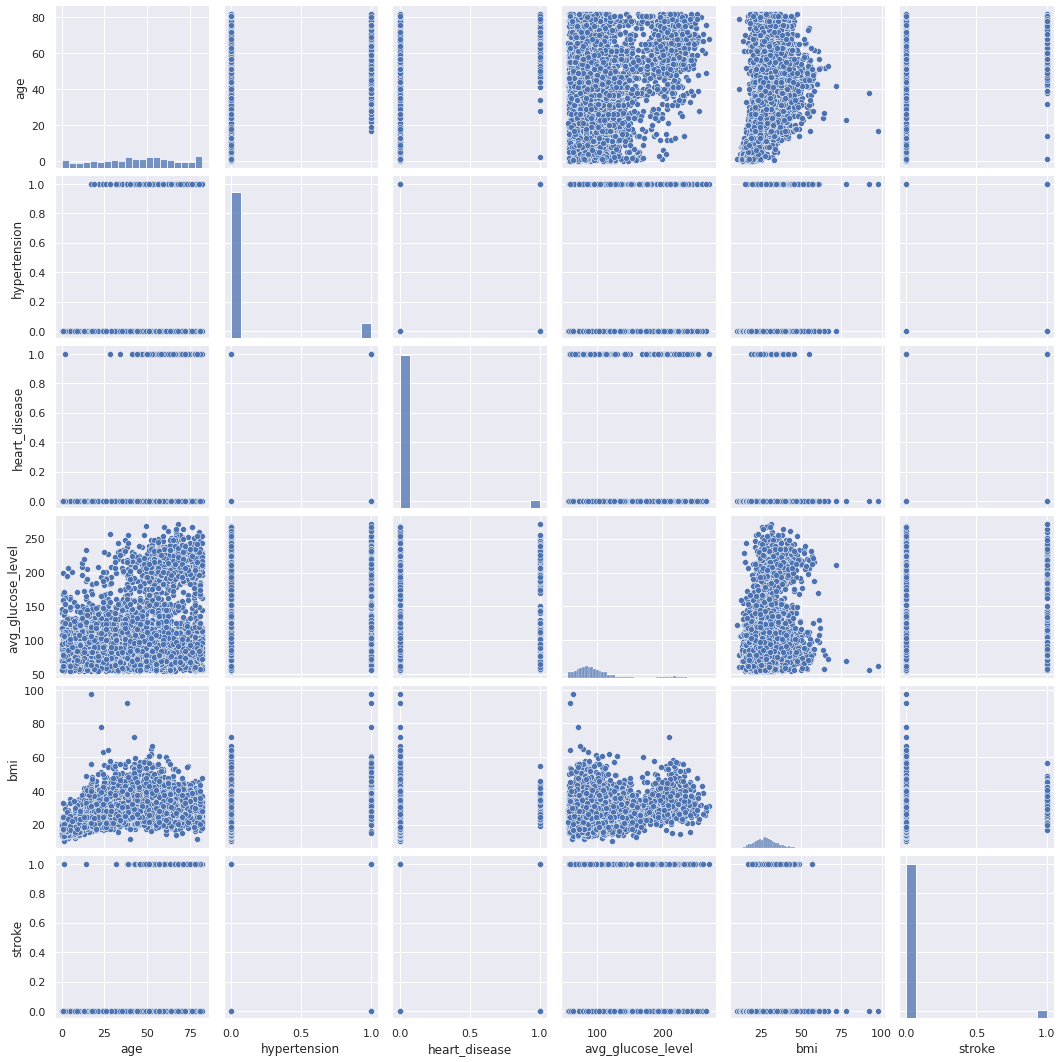

In [13]:
sns.pairplot(df)

In [14]:
#Filling missing bmi values
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

In [15]:
#We will treat Unknown smoking_status as NaN value
df['smoking_status'] = df['smoking_status'].replace('Unknown',np.nan)

In [16]:
df.isna().sum()

gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                     0
smoking_status       1544
stroke                  0
dtype: int64

In [17]:
df['smoking_status'].fillna(df['smoking_status'].mode()[0],inplace=True)

In [18]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

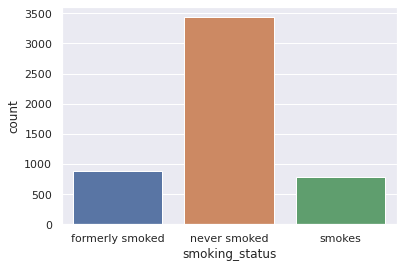

In [19]:
sns.countplot(x='smoking_status',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


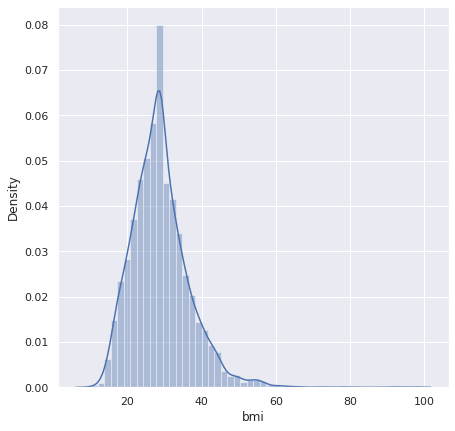

In [20]:
plt.figure(figsize=(7,7))
sns.distplot(df['bmi'])

In [21]:
#Splitting into dependent and independent variables
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [22]:
#OneHotEncoding columns
x=pd.get_dummies(data=x,columns=['gender','ever_married','work_type','Residence_type','smoking_status'],drop_first=True)

In [23]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          5110 non-null   float64
 1   hypertension                 5110 non-null   int64  
 2   heart_disease                5110 non-null   int64  
 3   avg_glucose_level            5110 non-null   float64
 4   bmi                          5110 non-null   float64
 5   gender_Male                  5110 non-null   uint8  
 6   gender_Other                 5110 non-null   uint8  
 7   ever_married_Yes             5110 non-null   uint8  
 8   work_type_Never_worked       5110 non-null   uint8  
 9   work_type_Private            5110 non-null   uint8  
 10  work_type_Self-employed      5110 non-null   uint8  
 11  work_type_children           5110 non-null   uint8  
 12  Residence_type_Urban         5110 non-null   uint8  
 13  smoking_status_nev

In [24]:
#Converting age to int as all values are in perfect int format
x['age']=x['age'].astype('int')

In [25]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          5110 non-null   int64  
 1   hypertension                 5110 non-null   int64  
 2   heart_disease                5110 non-null   int64  
 3   avg_glucose_level            5110 non-null   float64
 4   bmi                          5110 non-null   float64
 5   gender_Male                  5110 non-null   uint8  
 6   gender_Other                 5110 non-null   uint8  
 7   ever_married_Yes             5110 non-null   uint8  
 8   work_type_Never_worked       5110 non-null   uint8  
 9   work_type_Private            5110 non-null   uint8  
 10  work_type_Self-employed      5110 non-null   uint8  
 11  work_type_children           5110 non-null   uint8  
 12  Residence_type_Urban         5110 non-null   uint8  
 13  smoking_status_nev

In [26]:
#Splitting Dataset into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=26)

In [27]:
#SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE()
x_train_sm, y_train_sm = smt.fit_resample(x_train, y_train)
# print(y_train_sm.value_counts())

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [28]:
#Scaling data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_sm = sc.fit_transform(x_train_sm)
x_test = sc.transform(x_test)

In [29]:
#Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingClassifier

[07:36:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


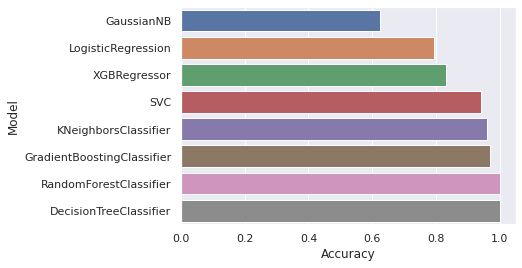

In [30]:
models = [LogisticRegression(),RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),GaussianNB(),SVC(),XGBRegressor(),GradientBoostingClassifier()]
scores={'Model':[],'Accuracy':[]}
for i in models:
  i.fit(x_train_sm,y_train_sm)
  score = i.score(x_train_sm,y_train_sm)
  scores['Model'].append(i.__class__.__name__)
  scores['Accuracy'].append(score)
mod_acc = pd.DataFrame(scores)
sns.barplot(x='Accuracy',y='Model',data=mod_acc.sort_values('Accuracy'))

In [31]:
#DecisionTreeClassifier
classifier = DecisionTreeClassifier().fit(x_train_sm,y_train_sm)
y_pred = classifier.predict(x_test)

In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)
print('Accuracy Score:',accuracy_score(y_test,y_pred)*100)
print('Classification Report for test set:')
print(classification_report(y_test,y_pred))

Confusion Matrix:
[[1138   78]
 [  56    6]]
Accuracy Score: 89.51486697965572
Classification Report for test set:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1216
           1       0.07      0.10      0.08        62

    accuracy                           0.90      1278
   macro avg       0.51      0.52      0.51      1278
weighted avg       0.91      0.90      0.90      1278



In [33]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train_sm, y = y_train_sm, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 94.29 %
Standard Deviation: 5.35 %
